# Speed Dating Analysis
#### Philipp Kaltofen | 1839909

### Introduction
For this assignment I chose the Speed Dating dataset from Kaggle (https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment).

In [2]:
# library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import math

c:\Users\pkalt\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
# import csv file
df = pd.read_csv("speedDating.csv", encoding = "ISO-8859-1")

In [5]:
# look at head
df.head

<bound method NDFrame.head of       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...

In [6]:
# look at correlations
corr = df.corr()
corr

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,1.000000,0.117109,0.051937,0.120362,0.220413,0.996713,0.231881,0.081287,0.070443,0.090696,...,-0.003738,-0.005157,-0.117348,0.039944,-0.020409,0.092325,-0.053698,0.006949,0.100164,0.055229
id,0.117109,1.000000,-0.011623,0.998029,0.318768,0.091571,0.374462,0.168382,0.174008,0.149216,...,0.024213,-0.041815,-0.051621,-0.029917,0.010202,-0.018183,-0.007993,-0.088398,-0.046558,-0.119108
gender,0.051937,-0.011623,1.000000,0.033645,-0.002627,-0.001264,0.020630,-0.001091,0.005853,0.006685,...,-0.125433,-0.159709,0.023925,-0.144642,-0.058300,-0.103692,-0.289694,0.076538,-0.067432,0.055267
idg,0.120362,0.998029,0.033645,1.000000,0.324838,0.092645,0.387715,0.171495,0.177639,0.154691,...,0.020597,-0.051671,-0.051081,-0.036368,0.007404,-0.020785,-0.022967,-0.086071,-0.050316,-0.118940
condtn,0.220413,0.318768,-0.002627,0.324838,1.000000,0.219627,0.816316,0.329120,0.308641,0.324108,...,0.082965,0.034376,0.067836,0.066229,0.023614,0.068552,-0.063407,0.068622,0.114254,0.145598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,0.092325,-0.018183,-0.103692,-0.020785,0.068552,0.092906,0.025047,0.073360,0.201356,0.009776,...,0.851922,0.177047,0.444624,0.400945,0.222258,1.000000,0.197948,0.378176,0.406725,0.205368
sinc5_3,-0.053698,-0.007993,-0.289694,-0.022967,-0.063407,-0.028111,-0.027437,0.099616,0.102406,-0.010260,...,0.222731,0.614853,0.313755,0.184837,0.130029,0.197948,1.000000,0.505440,0.331171,0.268553
intel5_3,0.006949,-0.088398,0.076538,-0.086071,0.068622,0.000644,0.000923,0.093856,0.112979,-0.000037,...,0.351189,0.275642,0.681735,0.251750,0.263402,0.378176,0.505440,1.000000,0.270181,0.424972
fun5_3,0.100164,-0.046558,-0.067432,-0.050316,0.114254,0.103025,0.105866,0.148984,0.236393,0.043915,...,0.388431,0.172901,0.292684,0.775198,0.336507,0.406725,0.331171,0.270181,1.000000,0.398011


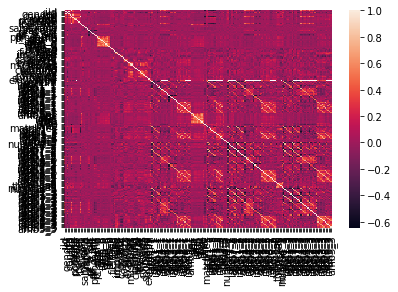

In [7]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

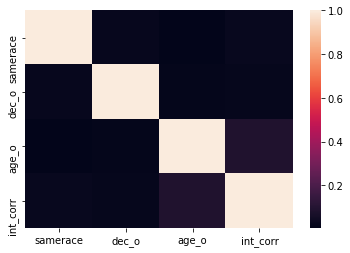

In [8]:
# correlation between some variables and decicion
dfFiltered = df[["samerace", "dec_o", "age_o", "int_corr"]]
corrFiltered = dfFiltered.corr()
sns.heatmap(corrFiltered, xticklabels=corrFiltered.columns, yticklabels=corrFiltered.columns)

In [9]:
corrFiltered

,samerace,dec_o,age_o,int_corr
samerace,1.000000,0.023626,0.005766,0.025215
dec_o,0.023626,1.000000,0.015128,0.019005
age_o,0.005766,0.015128,1.000000,0.089677
int_corr,0.025215,0.019005,0.089677,1.000000


Now I will look at some more demographic data in regards to *dec_o*.

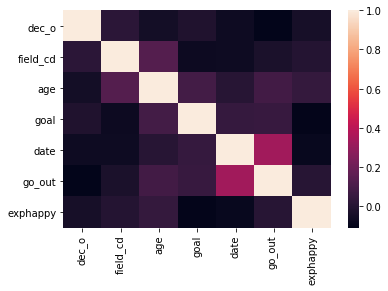

In [10]:
dfDemo = df[["dec_o", "field_cd", "age", "mn_sat", "income", "goal", "date", "go_out", "exphappy"]]
corrDemo = dfDemo.corr()
sns.heatmap(corrDemo, xticklabels=corrDemo.columns, yticklabels=corrDemo.columns)

In [11]:
corrDemo

,dec_o,field_cd,age,goal,date,go_out,exphappy
dec_o,1.000000,0.020921,-0.047854,-0.014354,-0.065328,-0.108468,-0.039715
field_cd,0.020921,1.000000,0.138069,-0.072600,-0.067584,-0.029070,-0.001385
age,-0.047854,0.138069,1.000000,0.089560,0.006817,0.084113,0.045277
goal,-0.014354,-0.072600,0.089560,1.000000,0.050662,0.053531,-0.100861
date,-0.065328,-0.067584,0.006817,0.050662,1.000000,0.336955,-0.085861
go_out,-0.108468,-0.029070,0.084113,0.053531,0.336955,1.000000,0.004421
exphappy,-0.039715,-0.001385,0.045277,-0.100861,-0.085861,0.004421,1.000000


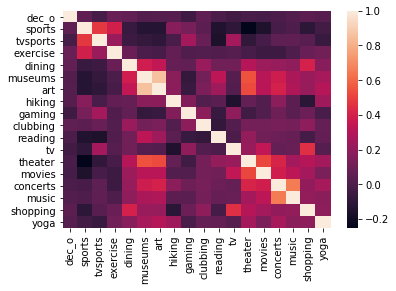

In [12]:
dfActivities = df[["dec_o", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]]
corrActivities = dfActivities.corr()
sns.heatmap(corrActivities, xticklabels=corrActivities.columns, yticklabels=corrActivities.columns)

Activities do not seem to influence the dependent variable a lot.

In [13]:
corrActivities.iloc[0]

dec_o       1.000000
sports      0.056901
tvsports   -0.021408
exercise    0.082492
dining      0.061716
museums     0.020517
art         0.024805
hiking      0.030378
gaming     -0.046669
clubbing    0.057276
reading    -0.001842
tv         -0.035415
theater    -0.009061
movies     -0.021548
concerts   -0.000336
music       0.016763
shopping    0.048957
yoga        0.027476
Name: dec_o, dtype: float64

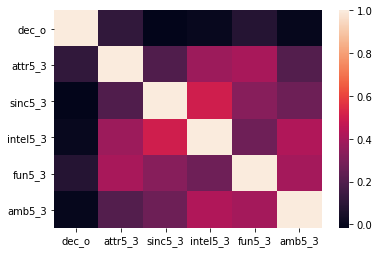

In [14]:
# see correlation between self perception and dec_o
dfSelf = df[["dec_o", "attr5_3", "sinc5_3", "intel5_3", "fun5_3", "amb5_3"]]
corrSelf = dfSelf.corr()
sns.heatmap(corrSelf, xticklabels=corrSelf.columns, yticklabels=corrSelf.columns)

In [15]:
corrSelf

,dec_o,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
dec_o,1.000000,0.114940,-0.016138,0.006987,0.083950,-0.003364
attr5_3,0.114940,1.000000,0.197948,0.378176,0.406725,0.205368
sinc5_3,-0.016138,0.197948,1.000000,0.505440,0.331171,0.268553
intel5_3,0.006987,0.378176,0.505440,1.000000,0.270181,0.424972
fun5_3,0.083950,0.406725,0.331171,0.270181,1.000000,0.398011
amb5_3,-0.003364,0.205368,0.268553,0.424972,0.398011,1.000000


In [16]:
corrSorted = corr["dec_o"].sort_values()

In [17]:
corrSorted

gender    -0.111550
go_out    -0.108468
shar1_s   -0.091229
shar1_1   -0.079075
sinc1_3   -0.074292
             ...   
fun_o      0.414276
attr_o     0.486885
like_o     0.513399
match      0.522326
dec_o      1.000000
Name: dec_o, Length: 187, dtype: float64

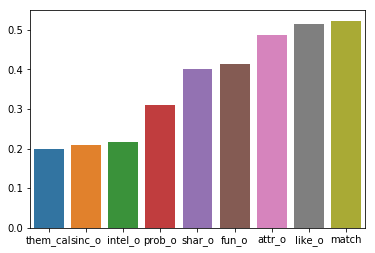

In [43]:
corrTransposed = pd.DataFrame(corrSorted.iloc[-10:-1]).T
sns.barplot(data=corrTransposed)

These are the highest correlations. How the other person (the one that also makes the decision *dec_o*) rates the participant regarding attractiveness, intellicence, if its a match etc. are standing out.

In [44]:
corrTransposed.columns

Index(['them_cal', 'sinc_o', 'intel_o', 'prob_o', 'shar_o', 'fun_o', 'attr_o',
       'like_o', 'match'],
      dtype='object')

In [20]:
# comparing self & prefered
dfPref = df[["dec_o", "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", "attr5_3", "sinc5_3", "intel5_3", "fun5_3", "amb5_3"]]

In [21]:
prefCorr = dfPref.corr()
prefCorr

,dec_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
dec_o,1.000000,-0.020910,0.028900,-0.006506,-0.003439,-0.022224,0.042590,0.114940,-0.016138,0.006987,0.083950,-0.003364
pf_o_att,-0.020910,1.000000,-0.439447,-0.349489,-0.183586,-0.475981,-0.453623,0.052063,0.118586,-0.032166,0.060190,-0.024261
pf_o_sin,0.028900,-0.439447,1.000000,-0.113403,-0.161119,0.005628,0.037845,-0.035429,-0.059383,0.009682,-0.026644,0.000655
pf_o_int,-0.006506,-0.349489,-0.113403,1.000000,-0.142172,-0.040297,-0.081243,-0.011193,-0.035511,0.011675,0.001190,0.011107
pf_o_fun,-0.003439,-0.183586,-0.161119,-0.142172,1.000000,-0.070598,-0.196330,-0.001917,0.026432,-0.013421,0.004332,0.029243
pf_o_amb,-0.022224,-0.475981,0.005628,-0.040297,-0.070598,1.000000,0.145760,-0.061571,-0.117870,0.039186,-0.069549,-0.002660
pf_o_sha,0.042590,-0.453623,0.037845,-0.081243,-0.196330,0.145760,1.000000,0.003576,-0.063176,0.020593,-0.038499,0.006907
attr5_3,0.114940,0.052063,-0.035429,-0.011193,-0.001917,-0.061571,0.003576,1.000000,0.197948,0.378176,0.406725,0.205368
sinc5_3,-0.016138,0.118586,-0.059383,-0.035511,0.026432,-0.117870,-0.063176,0.197948,1.000000,0.505440,0.331171,0.268553
intel5_3,0.006987,-0.032166,0.009682,0.011675,-0.013421,0.039186,0.020593,0.378176,0.505440,1.000000,0.270181,0.424972


I wanted to compare the self perception of the participants and if they have influence on the decision of the other person (higher confidence = more attractive?)

### Exploratory data analysis: Results
I filtered out the most promising independent variables that show a high correlation with the dependent variable *dec_o*. Not suprisingly, *match* is the highest one with 0.52. So, if the participant thinks its a match, the other one is likely to say so too.

# Predictive Model
As a predictive model I will use random forest. The algorithm sets up multiple random decision trees that at the end will predict an outcome. Each tree is trained on a different sample and subset of the training data. So some will only use some variables, while others may use different ones. In this case, we want to predict *dec_o*, which is either 1 (the other one wants a second date) or 0 (no second date). That makes this a classification problem. Each tree will have an prediction based on the randomized decisions (0 or 1 / no or yes). Then, a majority voting will take place, resulting in one final outcome.

In [22]:
import sklearn as sk
from sklearn.model_selection import train_test_split #We need this to split the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [151]:
# Create dataFrame with variables and drop NaNs
# dfSample = df[["them_cal", "sinc_o", "intel_o", "prob_o", "shar_o", "fun_o", "attr_o", "like_o", "match", "dec_o"]]

# top 30
dfSample = df[['length', 'attr7_3', 'sinc', 'intel', 'exercise', 'num_in_3', 'attr3_2',
       'fun5_3', 'fun3_1', 'attr3_s', 'fun3_3', 'attr3_1', 'fun3_2', 'fun3_s',
       'numdat_3', 'expnum', 'attr5_3', 'date_3', 'prob', 'amb_o', 'them_cal',
       'sinc_o', 'intel_o', 'prob_o', 'shar_o', 'fun_o', 'attr_o', 'like_o',
       'match', 'dec_o']]

# just take all
# dfSample = df.copy()

# dummies?
# dummies = pd.get_dummies(dfSample[["career", "field", "from"]])
# dfSample.drop(["career", "field", "from"], axis=1)
# dfSample = dfSample.join(dummies)

# drop all string type variables
# dfSample = dfSample.drop(["career", "field", "from", "undergra", "income", "mn_sat", "tuition", "zipcode"], axis=1)

# top 10
# dfSample = df[['them_cal', 'sinc_o', 'intel_o', 'prob_o', 'shar_o', 'fun_o', 'attr_o',
#        'like_o', 'match', 'dec_o']]

dfSample = dfSample.fillna(0)
# dfSample = dfSample.dropna()
# print(dfSample.isna())

In [136]:
# create data sets
# X = dfSample[["them_cal", "sinc_o", "intel_o", "prob_o", "shar_o", "fun_o", "attr_o", "like_o", "match"]] #create the X matrix
X = dfSample.drop('dec_o', axis=1) # use all variables except dependent
y = dfSample['dec_o'] # create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) #split the data, store it into different variables

In [142]:
# random forest
X_train, y_train = make_classification(n_samples=5000, n_features=29, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
# 'n_estimators': 10, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 2
clf = RandomForestClassifier(n_estimators=20, min_samples_leaf=6, max_features=8, max_depth=14, random_state=44)
clf.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
importances = clf.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print(f" The importance of feature '{columns[i]} is {round(importances[i] * 100, 2)}%.")
    i += 1

 The importance of feature 'length is 5.56%.
 The importance of feature 'attr7_3 is 86.88%.
 The importance of feature 'sinc is 0.35%.
 The importance of feature 'intel is 0.23%.
 The importance of feature 'exercise is 0.23%.
 The importance of feature 'num_in_3 is 0.3%.
 The importance of feature 'attr3_2 is 0.32%.
 The importance of feature 'fun5_3 is 0.24%.
 The importance of feature 'fun3_1 is 0.36%.
 The importance of feature 'attr3_s is 0.35%.
 The importance of feature 'fun3_3 is 0.28%.
 The importance of feature 'attr3_1 is 0.24%.
 The importance of feature 'fun3_2 is 0.2%.
 The importance of feature 'fun3_s is 0.23%.
 The importance of feature 'numdat_3 is 0.16%.
 The importance of feature 'expnum is 0.31%.
 The importance of feature 'attr5_3 is 0.21%.
 The importance of feature 'date_3 is 0.28%.
 The importance of feature 'prob is 0.22%.
 The importance of feature 'amb_o is 0.2%.
 The importance of feature 'them_cal is 0.28%.
 The importance of feature 'sinc_o is 0.37%.
 The 

In [144]:
result = clf.predict(X_test)
cm = confusion_matrix(y_test, result)
conf_matrix = pd.DataFrame(cm, index=['noDate', '2ndDate'], columns = ['noDate_p', '2ndDate_p']) 
conf_matrix

,noDate_p,2ndDate_p
noDate,906,1057
2ndDate,645,744


In [146]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test, result))
print("Accuracy = ", accuracy_score(y_test,result))

              precision    recall  f1-score   support

           0       0.58      0.46      0.52      1963
           1       0.41      0.54      0.47      1389

   micro avg       0.49      0.49      0.49      3352
   macro avg       0.50      0.50      0.49      3352
weighted avg       0.51      0.49      0.50      3352

Accuracy =  0.4922434367541766


In [141]:
# Inspired by https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier

# Use RandomSearchCV for better parameters
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

parameter_grid={'n_estimators':[1,2,3,4,5,6,7,8,9,10,20,30,40],'max_depth':[2,4,6,8,10,12,14,16,18,20],'min_samples_leaf': 
[1,2,4,6,8,10],'max_features':[1,2,3,4,5,6,7,8]}

number_models=20
random_RandomForest_class=RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=1,max_depth=1,min_samples_leaf=3, max_features=6, random_state=42), param_distributions=parameter_grid, n_iter=number_models, scoring='accuracy', n_jobs=2, cv=4,refit=True, return_train_score=True)

random_RandomForest_class.fit(X_train,y_train)
predictions=random_RandomForest_class.predict(X)

print("Accuracy Score",accuracy_score(y,predictions));
print("Best params",random_RandomForest_class.best_params_)
print("Best score",random_RandomForest_class.best_score_)

Accuracy Score 0.4456910957269038
Best params {'n_estimators': 20, 'min_samples_leaf': 6, 'max_features': 8, 'max_depth': 14}
Best score 0.9652


## Evaluation
I used the 29 highest correlating variables to predict the outcome *dec_o*. The model reaches an accuracy of ~0.49%. The prediction of "no second date" is 0.58, slightly higher than the prediction for "second date" with 0.41. The f1-score for the first one is slighty higher as well. This shows, that the model is minimaly better suited to predict if there will be no second date. I used a randomized search for the best parameters to use and tried different variables (all of them, the best 30, the best 10 ..). This is the highest accuracy I archieved.


# Conclusion
The most important feature in the model is *attr7_3* with a weight of 86.88%. *attr7_3* points to the question, how highly participants would rate attractiveness in their decision, opposed to other values. Every other variable has a weight of under 1% (except *length*). I was suprised how little impact *match* has on the model, at is has shown the highest correlation with *dec_o* in the exploration before. Therefor I conclude, that to improve the still rather low accuracy of *.49* I have to find better suited variables. I took the ones with the highest correlation to the dependent variable. However, with more feature engineering and better data cleaning (dropping NAs would remove every row), I think the model could be performing way better.